<a href="https://colab.research.google.com/github/xxtanghuruxx/2022390627_-/blob/main/2022390627_%EC%9D%B4%ED%98%84%EC%9A%B0week14%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install huggingface_hub

In [2]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_http.py", line 406, in hf_raise_for_status
    response.raise_for_status()
  File "/usr/local/lib/python3.10/dist-packages/requests

In [3]:
!pip install langchain

In [4]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.21
    Uninstalling langchain-core-0.3.21:
      Successfully uninstalled langchain-core-0.3.21
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.9
    Uninstalling langchain-0.3.9:
      Successfully uninstalled langchain-0.3.9


In [5]:
!pip install langchain-huggingface

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
# from langchain_openai import OpenAIEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma

from typing import List
from langchain.schema import Document  # Import Document if needed
import pandas as pd


In [9]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.4 MB/s eta 0:00:00


In [15]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 6.2 MB/s eta 0:00:

In [21]:
from sentence_transformers import SentenceTransformer, util

# 모델 로드
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# 예시 문장
sentence1 = "Hugging Face is a great platform for NLP."
sentence2 = "I enjoy using Hugging Face for natural language processing."

# 문장을 Embedding 벡터로 변환
embedding1 = model.encode(sentence1)
embedding2 = model.encode(sentence2)

# 유사도 계산
similarity = util.cos_sim(embedding1, embedding2)

print(f"문장 1: {sentence1}")
print(f"문장 2: {sentence2}")
print(f"유사도 점수: {similarity.item():.4f}")


문장 1: Hugging Face is a great platform for NLP.
문장 2: I enjoy using Hugging Face for natural language processing.
유사도 점수: 0.8269


In [25]:
# Document Load
loader = TextLoader('/content/drive/MyDrive/data_config.json')
data = loader.load()

In [27]:
import json

# JSON 파일 열기, Google Drive 경로 사용
with open("/content/drive/MyDrive/data_config.json", "r", encoding="utf-8") as file:
    config = json.load(file)

# JSON 내용 출력
print("JSON 파일 내용:")
print(json.dumps(config, indent=4, ensure_ascii=False))

JSON 파일 내용:
[
    {
        "name": "stackexchange_title_body/skeptics.stackexchange.com.jsonl.gz",
        "lines": 10009,
        "weight": 1
    },
    {
        "name": "stackexchange_TitleBody_Answer/islam.stackexchange.com.jsonl.gz",
        "lines": 10052,
        "weight": 1
    },
    {
        "name": "stackexchange_Title_Answer/islam.stackexchange.com.jsonl.gz",
        "lines": 10052,
        "weight": 1
    },
    {
        "name": "stackexchange_TitleBody_Answer/anime.stackexchange.com.jsonl.gz",
        "lines": 10131,
        "weight": 1
    },
    {
        "name": "stackexchange_Title_Answer/anime.stackexchange.com.jsonl.gz",
        "lines": 10131,
        "weight": 1
    },
    {
        "name": "stackexchange_title_body/writers.stackexchange.com.jsonl.gz",
        "lines": 10157,
        "weight": 1
    },
    {
        "name": "stackexchange_title_body/astronomy.stackexchange.com.jsonl.gz",
        "lines": 10462,
        "weight": 1
    },
    {
        "name": "

In [28]:
{
  "input_file": "data/sentences.txt",
  "model_name": "sentence-transformers/all-MiniLM-L6-v2",
  "output_dir": "output/embeddings"
}


{'input_file': 'data/sentences.txt',
 'model_name': 'sentence-transformers/all-MiniLM-L6-v2',
 'output_dir': 'output/embeddings'}

In [31]:
[
  {
    "sentence": "Hugging Face is amazing.",
    "embedding": [0.1, -0.3, 0.5, ...]
  },
  {
    "sentence": "I enjoy working with Transformers.",
    "embedding": [0.2, 0.4, -0.1, ...]
  }
]


[{'sentence': 'Hugging Face is amazing.',
  'embedding': [0.1, -0.3, 0.5, Ellipsis]},
 {'sentence': 'I enjoy working with Transformers.',
  'embedding': [0.2, 0.4, -0.1, Ellipsis]}]

In [41]:
from sentence_transformers import SentenceTransformer

# 모델 로드
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# 문장 리스트
sentences = [
    "Hugging Face is a great platform.",
    "I love using sentence transformers.",
    "Natural Language Processing is amazing."
]

# 문장 Embedding 생성
embeddings = model.encode(sentences)

# 결과 출력
print("문장과 해당 Embedding 벡터:")
for i, sentence in enumerate(sentences):
    print(f"\n문장 {i+1}: {sentence}")
    print(f"Embedding 벡터: {embeddings[i][:5]} ...")  # 벡터 일부만 출력


문장과 해당 Embedding 벡터:

문장 1: Hugging Face is a great platform.
Embedding 벡터: [ 0.01423684  0.06085668  0.02971506 -0.01793299  0.01475256] ...

문장 2: I love using sentence transformers.
Embedding 벡터: [-0.07733141 -0.01137962 -0.00760283  0.01297298 -0.00748686] ...

문장 3: Natural Language Processing is amazing.
Embedding 벡터: [ 0.0175006  -0.07524546  0.05393202 -0.01476639  0.01165496] ...


In [42]:
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2", config=config)

# Step 3: 문장 토큰화 & 임베딩 생성
sentences = ["Hugging Face is amazing.", "Transformers are powerful tools."]
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)

# 모델에 입력
outputs = model(**inputs)

# 결과 확인 (문장 임베딩)
embeddings = outputs.last_hidden_state.mean(dim=1)  # 평균 풀링
print("생성된 Embedding 벡터:")
print(embeddings)

생성된 Embedding 벡터:
tensor([[-3.5266e-01,  4.6266e-01,  4.1557e-01,  3.2906e-02, -1.6781e-01,
         -1.0370e-01, -1.3361e-01, -5.8878e-01,  1.7041e-02, -2.8860e-01,
          1.4271e-01, -3.5239e-02, -2.4410e-01,  3.9240e-01,  5.1001e-01,
         -9.8160e-02,  3.9752e-01, -5.2313e-02,  2.0677e-01,  3.7166e-01,
         -4.4390e-01,  1.5490e-01,  3.2520e-01, -2.1881e-01,  4.5465e-03,
         -8.0281e-02,  3.1008e-01, -2.5957e-01,  5.6335e-01, -1.3417e-01,
         -2.9517e-01, -2.5112e-01, -3.3669e-01,  1.2420e-01, -6.7397e-01,
          7.1088e-01,  9.8258e-02,  3.1905e-01, -4.2426e-01, -1.4813e-01,
         -5.4265e-01,  3.2950e-01,  4.3439e-01, -7.2228e-02,  1.2388e-01,
          8.3054e-02, -5.4195e-02,  1.8319e-01,  4.1119e-01, -5.4232e-01,
         -3.3694e-01, -4.8295e-01, -7.4142e-02, -3.8878e-01,  1.8023e-01,
          1.4928e-01, -3.8401e-02, -6.9758e-01, -3.2298e-01,  1.6701e-01,
         -5.4726e-02,  4.1897e-01,  3.1745e-02, -4.7956e-02, -3.2984e-01,
         -3.9216e-01

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

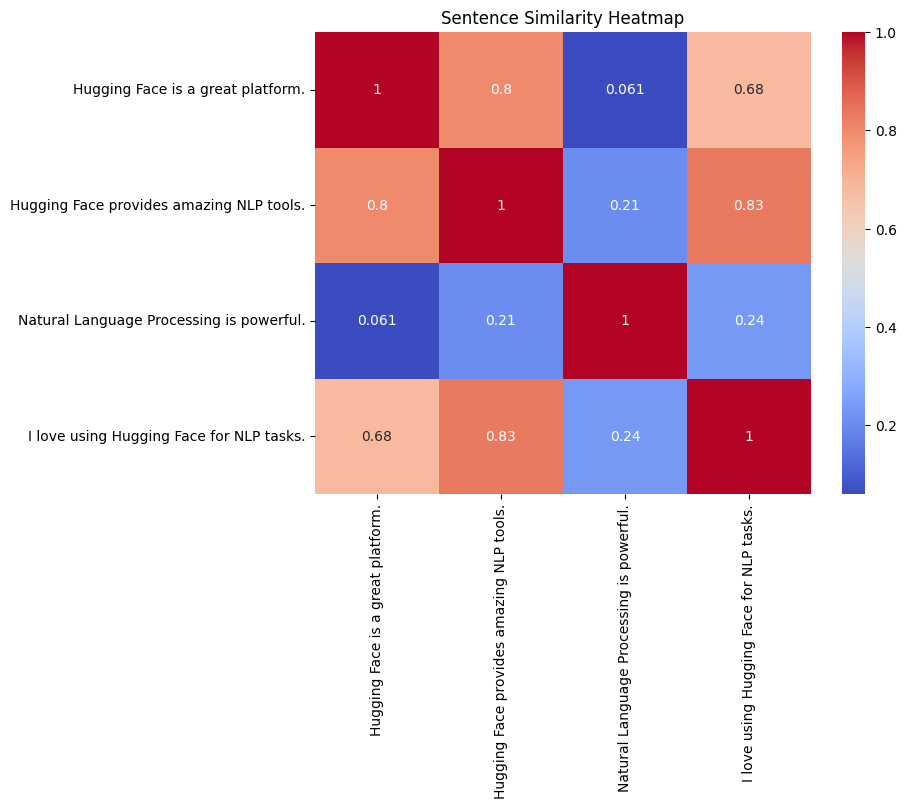

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
import numpy as np

# 모델 로드
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# 문장 리스트
sentences = [
    "Hugging Face is a great platform.",
    "Hugging Face provides amazing NLP tools.",
    "Natural Language Processing is powerful.",
    "I love using Hugging Face for NLP tasks."
]

# 문장 임베딩 생성
embeddings = model.encode(sentences)

# 문장 유사도 계산 (Cosine similarity)
cosine_sim_matrix = util.pytorch_cos_sim(embeddings, embeddings)

# 히트맵으로 유사도 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_matrix.cpu().detach().numpy(), annot=True, cmap='coolwarm', xticklabels=sentences, yticklabels=sentences)
plt.title('Sentence Similarity Heatmap')
plt.show()
